NOTE TO GRADER: It is my understanding tht a pdf of my Jupyter Notebook is sufficient for submission. Please let me know if you would like, and I am happy to send you my code. Have a great day! - Justin A

In [2]:
import json
import os

# Get the current working directory
current_directory = os.getcwd()
dataset_filename = "Sarcasm_Headlines_Dataset_v2.json"
dataset_file_path = os.path.join(current_directory, dataset_filename)

data = []
with open(dataset_file_path, 'r') as f:
    # load in JSON object line by line, since it is not formatted properly for all-at-once upload
    for line in f:
        # Load JSON object from line
        json_object = json.loads(line)
        # Append JSON object to data list
        data.append(json_object)

In [3]:
import sklearn
from sklearn.model_selection import train_test_split

# Extract 'headline' and 'is_sarcastic' from each dictionary in the data list
headlines = [entry['headline'] for entry in data]
is_sarcastic = [entry['is_sarcastic'] for entry in data]

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(headlines, is_sarcastic, test_size=0.2, random_state=None)

print("Several values of X_train:")
for headline in X_train[:10]:
    print(headline)

print("\nSeveral values of Y_train:")
print(Y_train[:10])

Several values of X_train:
getting transit back on track in la county
the enemy of my enemy: islamic state and the internationalization of the syrian and iraqi civil wars
screwball jim nabors goofs up again by marrying man
study finds majority of urban households located in roller rink deserts
florida shooter's former friend says she reported him to school 'multiple' times
jetblue could soon let you scan your face to board planes
¡que vivan los amos de casa!
clive cussler realizes latest novel not thrilling 3 hours after sending it to printer
jen aniston refuses to 'inject sh-t' into her face
former high-school bully pulls you over for speeding

Several values of Y_train:
[0, 0, 1, 1, 0, 0, 0, 1, 0, 1]


sarcastic_count:13634
not_sarcastic_count:14985


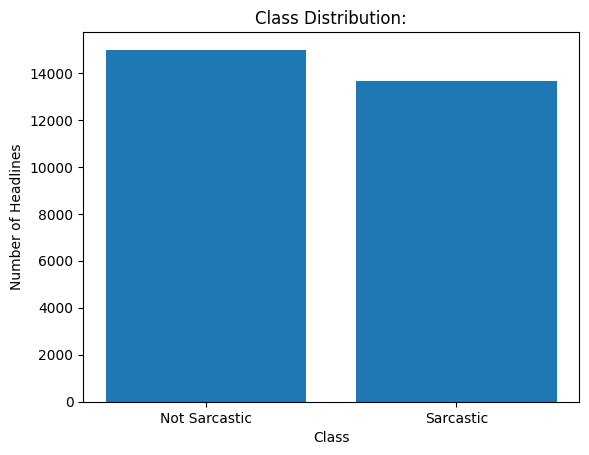

In [4]:
import matplotlib.pyplot as plt

# count occurrences of each class (0: not sarcastic, 1: srcastic)
sarcastic_count = sum(Y_train) + sum(Y_test)
not_sarcastic_count = len(Y_train) + len(Y_test) - sarcastic_count

print(f"sarcastic_count:{sarcastic_count}")
print(f"not_sarcastic_count:{not_sarcastic_count}")

# graph showing distribution of target classes
plt.bar(['Not Sarcastic', 'Sarcastic'],[not_sarcastic_count, sarcastic_count])
plt.title('Class Distribution:')
plt.xlabel('Class')
plt.ylabel('Number of Headlines')
plt.show()

DESCRIPTION OF DATASET:

This dataset contains over 28,000 headlines from the humor satire news site The Onion and the leftwing online publication HuffPost. Onion headlines are characterized by exagerration, humor, goofy seriousness, and treating regular, silly daily life events as headline-worthy events. HuffPost headlines concentrate on issues of interest to leftwing voters, such as rightwing scandals, the environment, LGBTQ social issues, racial justice, and women's rights.
- data: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection?resource=download
- The Onion: https://www.theonion.com/latest
- HuffPost: https://www.huffpost.com/

Typical examples of serious, non-sarcastic headlines:
- egyptian death sentence for soccer fans puts president's iron grip to the test
- texas attorney general ken paxton indicted
- congresswoman fights for gun control because she almost lost her life to gun violence

Typical examples of sarcastic/funny/satire news headlines:
- disgruntled liberals publishing at furious pace
- period of time in which parents proud of how much child can eat quickly dwindling
- alcohol only thing making operating heavy machinery bearable

WHAT THE MODEL SHOULD BE ABLE TO PREDICT:
- The model should be able to predict whether the headline should get the label "not sarcastic" vs "is sarcastic" (while "not satire" vs "is satire" would probably be a better descriptor, the author decided to stick with the original dataset's labels for readability)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

# Fit the vectorizer to the data and transform X_train and X_test
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the data and transform X_train and X_test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [21]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

# Train and evalute the model with COUNT VECTOR
nb_model.fit(X_train_counts, Y_train)
nb_accuracy = nb_model.score(X_test_counts, Y_test)
print("NAIVE BAYES ACCURACY, COUNT VECTORS:", nb_accuracy)

# Train and evaluate the model with TF-IDF
nb_model.fit(X_train_tfidf, Y_train)
nb_accuracy = nb_model.score(X_test_tfidf, Y_test)
print("NAIVE BAYES ACCURACY, TF-IDF:", nb_accuracy)

NAIVE BAYES ACCURACY, COUNT VECTORS: 0.8485324947589099
NAIVE BAYES ACCURACY, TF-IDF: 0.8359538784067087


In [23]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)

# Train and evaluate the model with COUNT VECTOR
lr_model.fit(X_train_counts, Y_train)
lr_accuracy = lr_model.score(X_test_counts, Y_test)
print("LOGISTIC REGRESSION ACCURACY, COUNT VECTORS:", lr_accuracy)

# Train and evaluate the model with TF-IDF
lr_model.fit(X_train_tfidf, Y_train)
lr_accuracy = lr_model.score(X_test_tfidf, Y_test)
print("LOGISTIC REGRESSION ACCURACY, TF-IDF:", lr_accuracy)

LOGISTIC REGRESSION ACCURACY, COUNT VECTORS: 0.8457372466806429
LOGISTIC REGRESSION ACCURACY, TF-IDF: 0.8441649196366178


In [8]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(25,), max_iter=5)

# Train and evaluate the model with COUNT VECTOR
nn_model.fit(X_train_counts, Y_train)
nn_accuracy = nn_model.score(X_test_counts, Y_test)
print("NEURAL NETWORK ACCURACY, COUNT VECTORS:", nn_accuracy)

# Train and evaluate the model with TF-IDF
nn_model.fit(X_train_tfidf, Y_train)
nn_accuracy = nn_model.score(X_test_tfidf, Y_test)
print("NEURAL NETWORK ACCURACY, TF-IDF:", nn_accuracy)

e:\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


NEURAL NETWORK ACCURACY, COUNT VECTORS: 0.8471348707197763
NEURAL NETWORK ACCURACY, TF-IDF: 0.8539482879105521


e:\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS:
- NAIVE BAYES ACCURACY, COUNT VECTORS: 84.85%
- NAIVE BAYES ACCURACY, TF-IDF: 83.59%
- LOGISTIC REGRESSION ACCURACY, COUNT VECTORS: 84.57%
- LOGISTIC REGRESSION ACCURACY, TF-IDF: 84.41%
- NEURAL NETWORK ACCURACY, HIDDEN LAYER = 25, MAX_ITER = 5,COUNT VECTORS: 84.71%
- NEURAL NETWORK ACCURACY, HIDDEN LAYER = 25, MAX_ITER = 5,TF-IDF: 85.39%
- NEURAL NETWORK ACCURACY, HIDDEN LAYER = 50, MAX_ITER = 5, COUNT VECTORS: 84.43%
- NEURAL NETWORK ACCURACY, HIDDEN LAYER = 50, MAX_ITER = 5, TF-IDF: 85.06%
- NEURAL NETWORK ACCURACY, HIDDEN LAYER = 50, MAX_ITER = 15, COUNT VECTORS: 81.81%
- NEURAL NETWORK ACCURACY, HIDDEN LAYER = 50, MAX_ITER = 15, TF-IDF: 81.90%

ANALYSIS I: MAJOR TAKEAWAYS:
- the 28,000+ data set provides a rich, robust, abundant source of high quality data
- however, about 15% of testing data entries apparently simply cannot be classified easily with rules learned from the testing data
- (given that this data is distinguishing *satire*, data that is un-classifiable merely with the data set makes sense. Consider trying to teach a child about satire using only satire - it can't be done. At some point, to fully train the child, you would have to include the thing that is being made fun of itself. Onion articles are not merely making fun of other news articles - they are making fun of society itself. The news headline + satire headline data set, on its own, simply doesn't provide enough data to learn how to distinguish between real news and satire every time.)
- (This problem is exacerbated by very small amount of data in any headline - if the classification system used not just the headlines but the articles as well, it would likely be much more capable of accurately classifying test cases)
- this combination of 1) very high quality training data and 2) numerous testing entries that simply cannot be classified based on material learned from the testing data leads to two things: 1) numerous different classification processes easily clearing a decent threshold and 2) even the best classifiers having difficulty going beyond a particular point.
- This explains why all results are in an *extremely narrow* band: 83.6-85.4% success. That's really narrow!

Why are TF-IDF and Vector scores so similar?
- The data is headlines. There are few unimportant words as headlines are already optimized for importance. Also, the small amount of each data item in general (headlines are only a few words) likely makes each word very important, even if it would normally be a "filler" word. Therefore, TF-IDF - which normally wants to improve predictions by focusing on more important words - isn't able to provide much of an edge on simple count vectors.
- Furthermore, what little information TF-IDF has is likely tricky to utilize. Naive Bayes naively assumes feature independence, an assumption which may squander what little information edge TF-IDF can provide. This would explain why Naive Bayes struggles *a little* with the extra information provided by TF-IDF data - the Naive Bayes TF-IDF prediction is the worst, at 83.6%
- On the other hand, Neural Network Classification is capable of building an extremely sophisticated model. This explains why the Neural Network is best able to make use of the *slight* extra information provided by TF-IDF - leading to the Neural Network TF-IDF Classifier being the best at 85.4%

Overfitting makes the neural network classifications with 50 hidden layers or 15 iterations lower, as low as 81.8-81.9% accurate, significantly less than the 84.7-85.4% range of the neural networks confined to 5 iterations and 25 hidden layers.

ANALYSIS II: DETAILED ANALYSIS:
- NAIVE BAYES CLASSIFICATION - ANALYSIS:
- ASSUMPTIONS AND LIMITATIONS:
- Assumes independence between features, which may not hold true for text data where word occurrences are often correlated.
- Relies on the Bag-of-Words representation, which ignores word order and context, potentially losing important semantic information.

- STRENGTHS AND FEATURES:
- Efficient and easy to implement, making it suitable for large datasets.
- Works well with high-dimensional data like text, where the number of features (words) is large.
- Performs surprisingly well even with its simplistic assumptions, especially for binary classification tasks such as this task

- IMPROVEMENT STRATEGIES:
- Incorporate feature engineering techniques to capture more nuanced relationships between words.
- Experiment with different text preprocessing methods to optimize the representation of text data.
- Consider more advanced variants like Bernoulli Naive Bayes or Gaussian Naive Bayes, depending on the nature of the data.

LOGISTIC REGRESSION CLASSIFICATION ANALYSIS:
- ASSUMPTIONS AND LIMITATIONS:
- Assumes a linear relationship between the features and the log-odds of the outcome, which may not hold true for complex data.
- Sensitive to outliers and multicollinearity among features.

- STRENGTHS AND FEATURES:
- Robust to noise and handles both linear and non-linear relationships well with appropriate feature engineering.
- Can handle binary tasks efficiently.

- IMPROVEMENT STRATEGIES:
- Perform feature selection techniques like L1 regularization (Lasso) to identify and remove irrelevant features.
- Experiment with polynomial features or interaction terms to capture non-linear relationships in the data.

NEURAL NETWORK CLASSIFICATION ANALYSIS:
- ASSUMPTIONS AND LIMITATIONS:
- Assumes complex, non-linear relationships between features and outcomes, making it suitable for high-dimensional data but vulnerable to overfitting.
- Requires a large amount of data for training to avoid overfitting and achieve generalization.
- Sensitive to hyperparameter tuning and architecture choices, including the number of layers, neurons, and activation functions.

- STRENGTHS AND FEATURES:
- Capable of capturing intricate patterns and relationships in the data, including non-linear interactions between features.
- Can automatically learn hierarchical representations of features, potentially extracting more meaningful information from raw text data.
- Performs well with large datasets.

- IMPROVEMENT STRATEGIES:
- Experiment with different architectures such as deeper networks, convolutional neural networks (CNNs), or recurrent neural networks (RNNs) to capture different aspects of the data.
- Regularize the model using techniques like dropout or batch normalization to prevent overfitting.
- Utilize pre-trained word embeddings or language models to initialize the network weights and leverage transfer learning.

COUNT VECTORS vs TF-IDF:
- Use Count Vectors for tasks where word frequency directly correlates with importance, such as sentiment analysis.
- Use TF-IDF for tasks where distinguishing features are likely to be less frequent but highly informative, such as topic modeling or text categorization.